# IMAGE CLASSIFICATION - DEEP LEARNING🔬

### INSTALL AND SETUP 🔗

In [56]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\alexa\AppData\Local\Temp\pip-install-n0ucnmay\tensorflow-gpu_95b601a8400745c08665e450993b2cf7\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not buil


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


In [57]:
import tensorflow as tf
import os 

### REMOVE DODGY IMAGES❌
This snippet iterates over all images in the data directory, reading each image and checking its format using imghdr.what(). If the image format is not in the list of expected extensions (image_exts), it is removed. This is a precautionary step to clean the dataset.

In [58]:
import cv2
import imghdr

In [59]:
data_dir = 'data' 

In [60]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [61]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### LOAD DATA ⚙️
Loads the data from the data directory using TensorFlow's image_dataset_from_directory function, which automatically labels images based on the folder structure. The data is then visualized using Matplotlib to ensure it has been loaded correctly.

In [62]:
import numpy as np
from matplotlib import pyplot as plt

In [63]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [64]:
data_iterator = data.as_numpy_iterator()

In [65]:
batch = data_iterator.next()

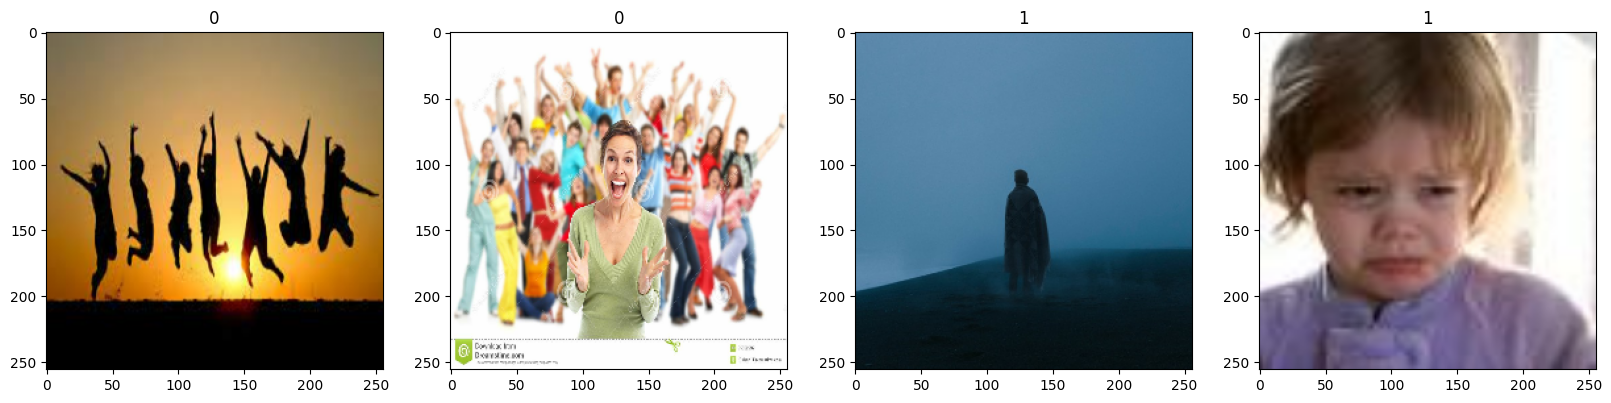

In [66]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### SCALE DATA 🪜
Normalizes the image data to the range [0, 1] by dividing by 255, which is the maximum value for an 8-bit color value.

In [67]:
data = data.map(lambda x,y: (x/255, y))

In [68]:
data.as_numpy_iterator().next()

(array([[[[0.92549783, 0.8431449 , 0.7215763 ],
          [0.92225796, 0.84774816, 0.7301011 ],
          [0.92293966, 0.84842986, 0.7307828 ],
          ...,
          [0.9834906 , 0.8910886 , 0.7412112 ],
          [0.9836397 , 0.8895221 , 0.7405025 ],
          [0.982958  , 0.8888404 , 0.7398208 ]],
 
         [[0.93929994, 0.856947  , 0.7353784 ],
          [0.9353784 , 0.8608686 , 0.7353784 ],
          [0.9432215 , 0.8687117 , 0.75106466],
          ...,
          [0.9942019 , 0.9079274 , 0.7549862 ],
          [0.99812347, 0.9040058 , 0.7549862 ],
          [0.99578524, 0.9016676 , 0.752648  ]],
 
         [[0.94168967, 0.8593367 , 0.73776805],
          [0.9377681 , 0.86325824, 0.73776805],
          [0.93879443, 0.86428463, 0.7466376 ],
          ...,
          [0.9994868 , 0.9132123 , 0.752428  ],
          [0.9994868 , 0.9132123 , 0.752428  ],
          [0.99607843, 0.9098039 , 0.7490196 ]],
 
         ...,
 
         [[0.17256841, 0.1456306 , 0.08268636],
          [0.18380

### SPLIT DATA➗
Splits the data into training, validation, and test datasets using the specified proportions (70% for training, 20% for validation, and 10% for testing).

In [69]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [70]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### BUILD DEEP LEARNING MODEL 🖊️
Defines a sequential neural network model with multiple convolutional layers (Conv2D), pooling layers (MaxPooling2D), a flattening layer (Flatten), and dense layers (Dense). The model uses the ReLU activation function for intermediate layers and the sigmoid activation function for the output layer since it is a binary classification. The model is then compiled with the Adam optimizer and binary crossentropy loss function.

In [71]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [73]:
model = Sequential()

In [74]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [75]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

### TRAIN 📚
Trains the model for 20 epochs on the training set with validation on the validation set. It also uses TensorBoard for visualization of training progress.

In [77]:
logdir='logs'

In [78]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [79]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 8s 562ms/step - loss: 1.2671 - accuracy: 0.5089 - val_loss: 0.7710 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 4s 412ms/step - loss: 0.7200 - accuracy: 0.5000 - val_loss: 0.6873 - val_accuracy: 0.4688
Epoch 3/20
7/7 [==============================] - 3s 340ms/step - loss: 0.6708 - accuracy: 0.5089 - val_loss: 0.6692 - val_accuracy: 0.4062
Epoch 4/20
7/7 [==============================] - 3s 347ms/step - loss: 0.6157 - accuracy: 0.6205 - val_loss: 0.6056 - val_accuracy: 0.6250
Epoch 5/20
7/7 [==============================] - 3s 332ms/step - loss: 0.5471 - accuracy: 0.7277 - val_loss: 0.5577 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 4s 369ms/step - loss: 0.4336 - accuracy: 0.8080 - val_loss: 0.4349 - val_accuracy: 0.7656
Epoch 7/20
7/7 [==============================] - 3s 352ms/step - loss: 0.4903 - accuracy: 0.7812 - val_loss: 0.3517 - val_accuracy: 0.8438
Epoch 8/20
7/7 [====

### PLOT PERFORMANCE📉
Plots the training and validation loss and accuracy to help visualize the model's performance over epochs.

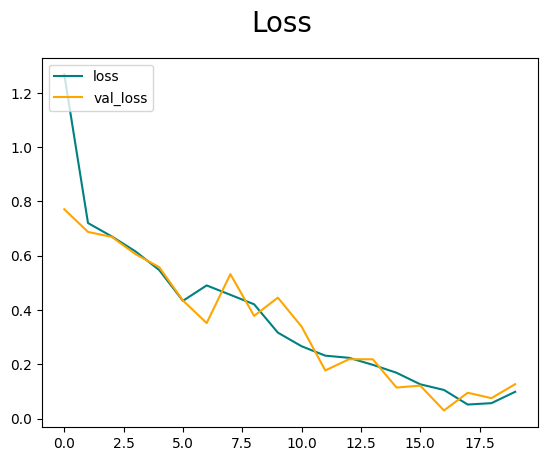

In [80]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

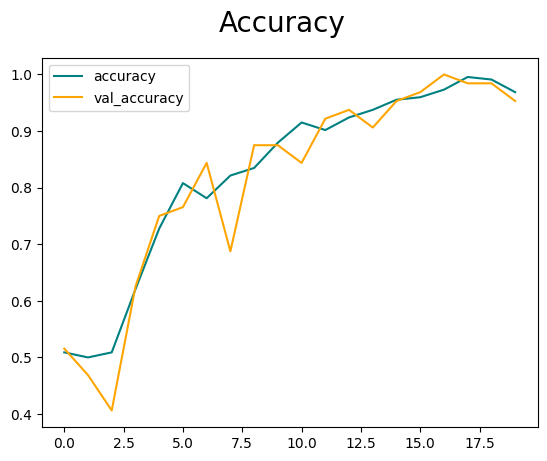

In [81]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### EVALUATE🏅
Calculates precision, recall, and accuracy metrics on the test dataset to evaluate the model's performance.

In [82]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [83]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [84]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 278ms/step


In [85]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


### TEST🔬

In [86]:
import cv2

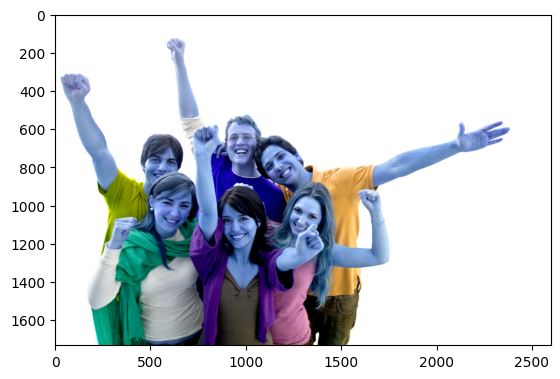

In [87]:
img = cv2.imread('data\happy\8cxKy5g9i.jpg')
plt.imshow(img)
plt.show()

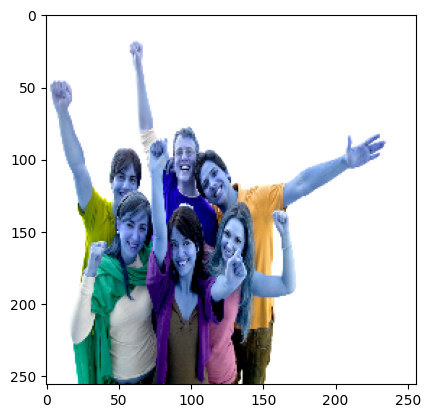

In [88]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [89]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 46ms/step


In [90]:
yhat

array([[0.01959043]], dtype=float32)

In [91]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


This script is an end-to-end example of a typical image classification task using convolutional neural networks (CNNs) with TensorFlow. It includes preprocessing, model definition, training, evaluation, and making predictions on new data.